<a href="https://colab.research.google.com/github/Trieunguyen1/project_AI/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/Garbage_classification/train')
labels = ['battery', 'cardboard', 'glass', 'metal', 'paper','plastic']
test_dir = os.path.join('/content/drive/MyDrive/Garbage_classification/test')
labels = ['battery', 'cardboard', 'glass', 'metal', 'paper','plastic']

In [ ]:
# checking the size of data available to us for training out model

for label in labels:
    directory1 = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory1)))

Images of label "battery":	 351
Images of label "cardboard":	 303
Images of label "glass":	 376
Images of label "metal":	 308
Images of label "paper":	 444
Images of label "plastic":	 339


In [ ]:
# checking the size of data available to us for testing out model
for label in labels:
    directory2 = os.path.join(test_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory2)))

Images of label "battery":	 120
Images of label "cardboard":	 100
Images of label "glass":	 125
Images of label "metal":	 102
Images of label "paper":	 148
Images of label "plastic":	 113


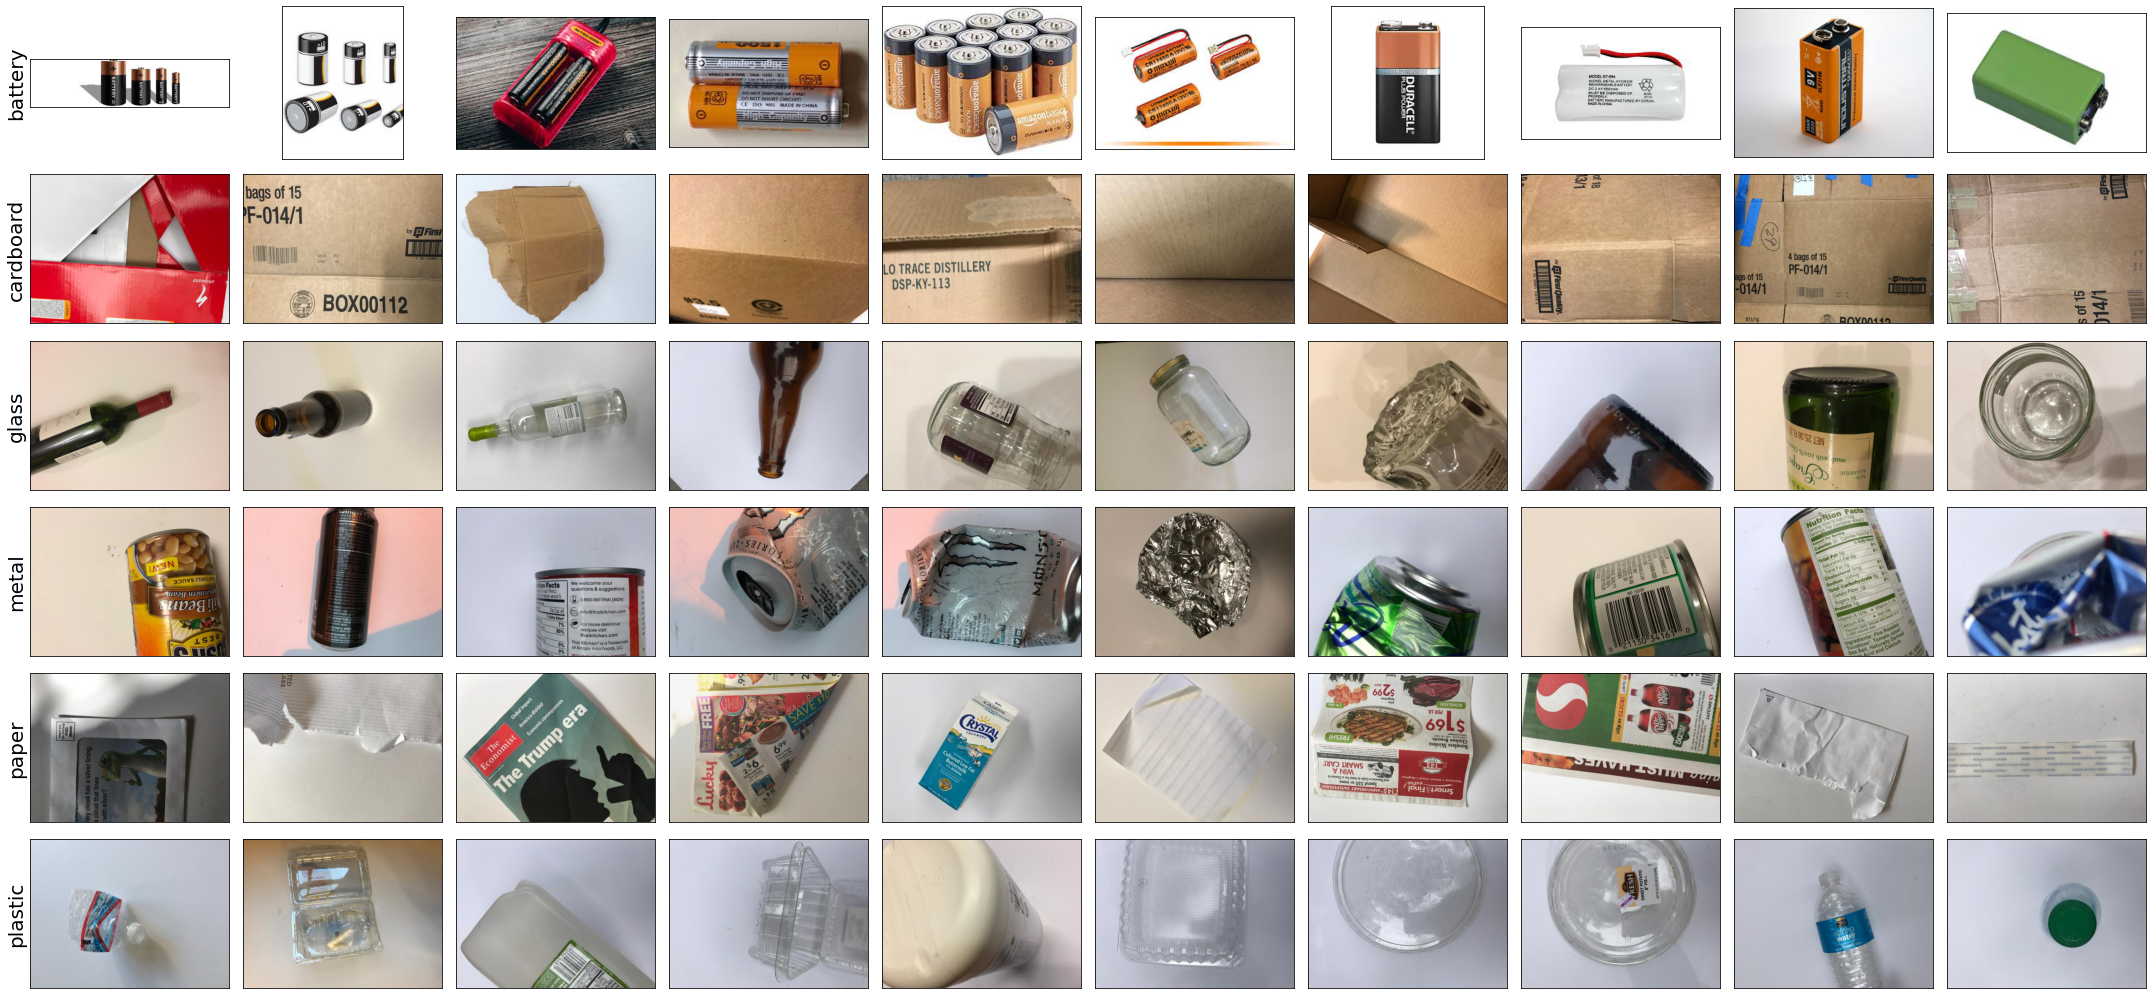

In [ ]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)  
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
   #Lớp CNN1                          
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
   #Lớp CNN2 
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
   #Lớp CNN3
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
   #Lớp CNN4
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
   #chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
  tf.keras.layers.Flatten(),
  #Lớp ẩn
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  #Lớp output
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 248, 32)       896       
                                                                 
 batch_normalization (BatchN  (None, 98, 248, 32)      128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 246, 32)       9248      
                                                                 
 batch_normalization_1 (Batc  (None, 96, 246, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 123, 32)      0         
 )                                                               
                                                        

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Garbage_classification/train', 
                                                    target_size=(384, 512), 
                                                    batch_size=32, 
                                                    class_mode='binary')
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Garbage_classification/test', 
                                                         target_size=(384, 512), 
                                                         batch_size=32, 
                                                         class_mode='binary')

Found 2121 images belonging to 6 classes.
Found 708 images belonging to 6 classes.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(lr = 0.0001), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# creating the callback function so that it can be used to end the training in case reached a good accuracy rate (above 90%)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, 
                    epochs=100, verbose=1, 
                    validation_data=validation_generator, 
                    callbacks=[callbacks])


Epoch 1/100
67/67 [==============================] - 243s 3s/step - loss: 1.9302 - accuracy: 0.3913 - val_loss: 2.0969 - val_accuracy: 0.1766
Epoch 2/100
67/67 [==============================] - 26s 394ms/step - loss: 1.6083 - accuracy: 0.4790 - val_loss: 2.3681 - val_accuracy: 0.1766
Epoch 3/100
67/67 [==============================] - 28s 414ms/step - loss: 1.4056 - accuracy: 0.5299 - val_loss: 2.4666 - val_accuracy: 0.1638
Epoch 4/100
67/67 [==============================] - 26s 393ms/step - loss: 1.3730 - accuracy: 0.5380 - val_loss: 2.6721 - val_accuracy: 0.1963
Epoch 5/100
67/67 [==============================] - 26s 390ms/step - loss: 1.2368 - accuracy: 0.5672 - val_loss: 3.5595 - val_accuracy: 0.2189
Epoch 6/100
67/67 [==============================] - 26s 388ms/step - loss: 1.2283 - accuracy: 0.5875 - val_loss: 3.4703 - val_accuracy: 0.2401
Epoch 7/100
67/67 [==============================] - 26s 395ms/step - loss: 1.1277 - accuracy: 0.6157 - val_loss: 2.6073 - val_accuracy: 0

Sai số kiểm tra là:  0.7253149151802063
Độ chính xác kiểm tra là:  0.7937853336334229


<function matplotlib.pyplot.show>

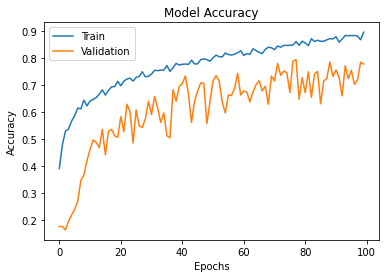

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_generator,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
#lưu model 
model.save('/content/gdrive/MyDrive/train_model_garbage_CNN.h5')